In [1]:
import numpy as np
import pandas as pd
import wrangle as w
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df, train, val, test = w.wrangle_data()

Opening data from local file.


# Univarite Analysis

In [3]:
explore_cols = df.columns

In [30]:
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    elif train[col].dtype == 'datetime64[ns]':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [35]:
cat_cols

['date',
 'year',
 'month',
 'customer_gender',
 'country',
 'state',
 'product_category',
 'sub_category',
 'quantity']

In [36]:
num_cols

['customer_age', 'unit_cost', 'unit_price', 'cost', 'revenue', 'total_price']

Univariate assessment of feature date:


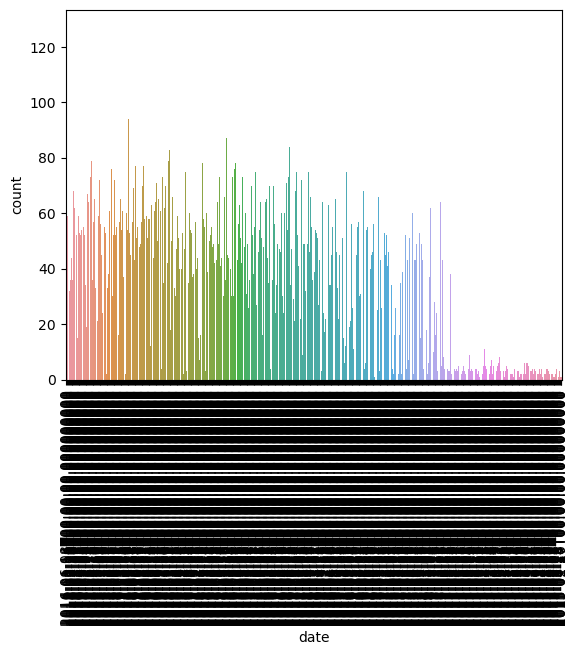

            date      date
2016-03-01   127  0.006505
2016-06-14    95  0.004866
2016-04-19    94  0.004815
2016-06-28    88  0.004507
2016-02-20    88  0.004507
...          ...       ...
2015-05-11     1  0.000051
2015-06-25     1  0.000051
2015-04-20     1  0.000051
2015-02-23     1  0.000051
2015-01-27     1  0.000051

[567 rows x 2 columns]
------------------------------
------------------------------
Univariate assessment of feature year:


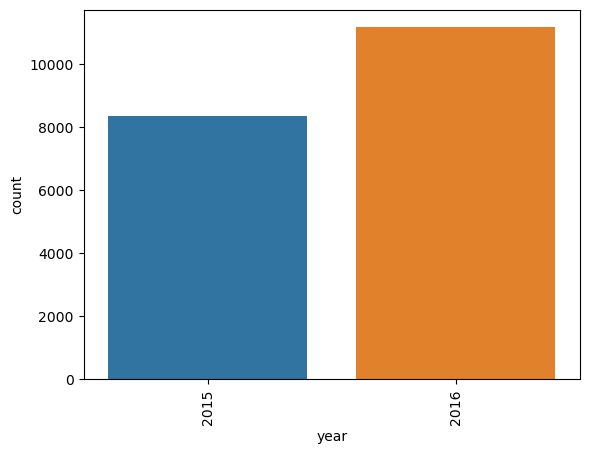

       year      year
2016  11171  0.572168
2015   8353  0.427832
------------------------------
------------------------------
Univariate assessment of feature month:


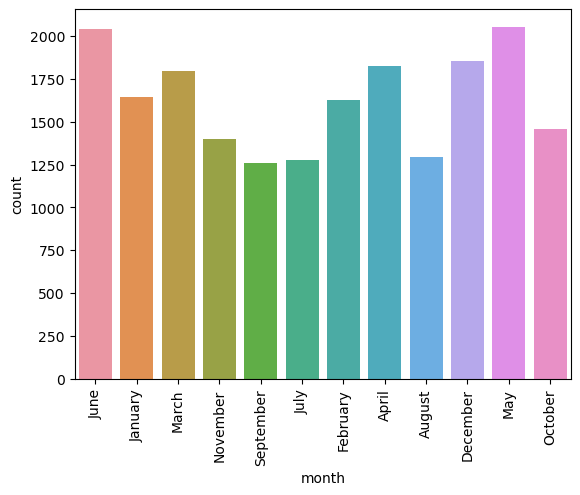

           month     month
May         2052  0.105101
June        2043  0.104640
December    1851  0.094806
April       1827  0.093577
March       1798  0.092092
January     1642  0.084102
February    1624  0.083180
October     1456  0.074575
November    1401  0.071758
August      1295  0.066329
July        1275  0.065304
September   1260  0.064536
------------------------------
------------------------------
Univariate Feature analysis of feature customer_age:


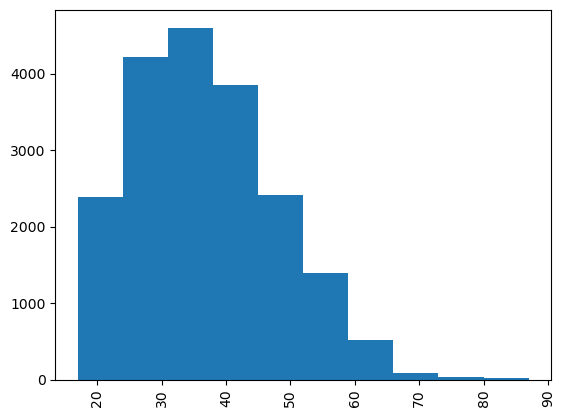

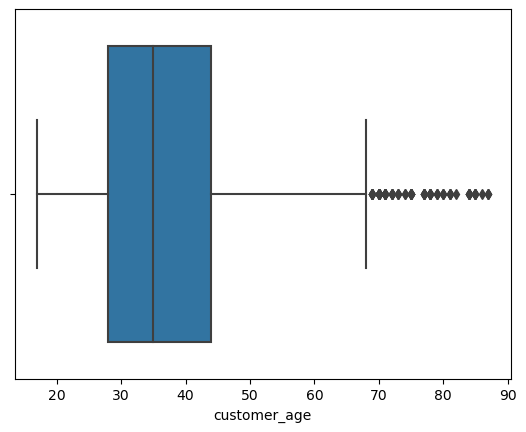

------------------------------
------------------------------
Univariate assessment of feature customer_gender:


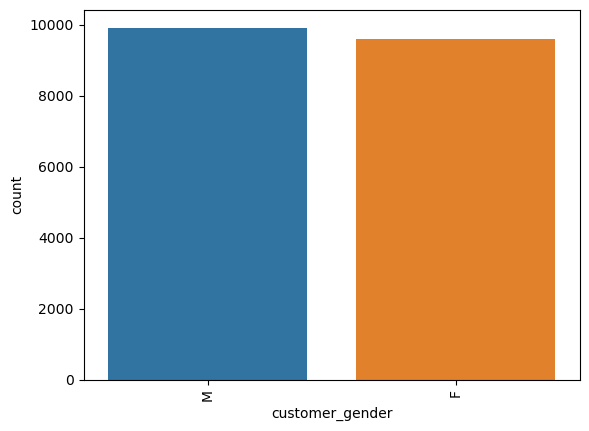

   customer_gender  customer_gender
M             9919         0.508041
F             9605         0.491959
------------------------------
------------------------------
Univariate assessment of feature country:


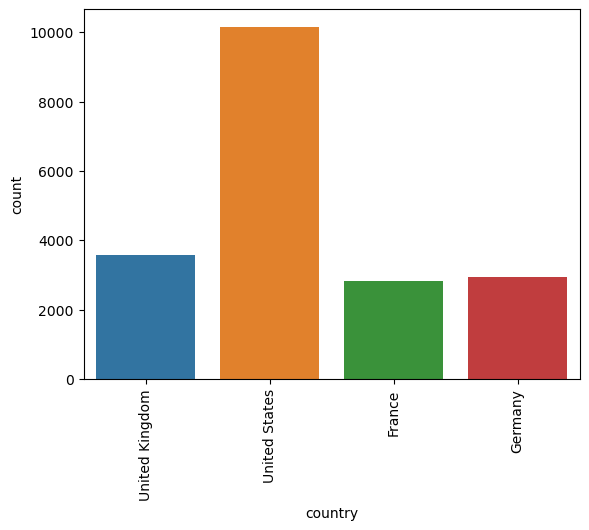

                country   country
United States     10154  0.520078
United Kingdom     3594  0.184081
Germany            2959  0.151557
France             2817  0.144284
------------------------------
------------------------------
Univariate assessment of feature state:


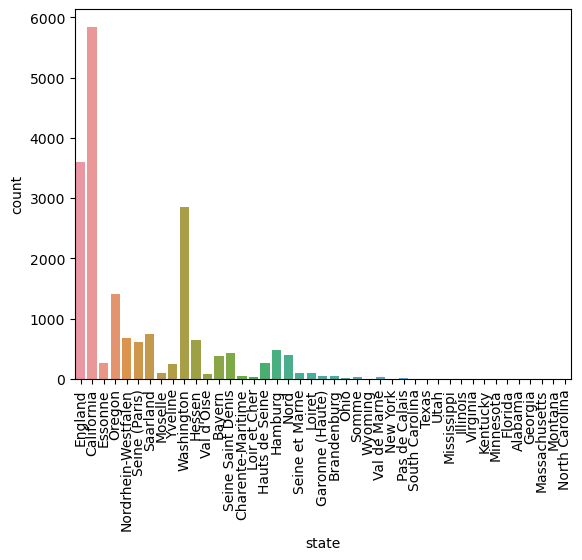

                     state     state
California            5842  0.299221
England               3594  0.184081
Washington            2856  0.146281
Oregon                1407  0.072065
Saarland               744  0.038107
Nordrhein-Westfalen    672  0.034419
Hessen                 639  0.032729
Seine (Paris)          619  0.031705
Hamburg                480  0.024585
Seine Saint Denis      438  0.022434
Nord                   397  0.020334
Bayern                 378  0.019361
Hauts de Seine         267  0.013675
Essonne                259  0.013266
Yveline                246  0.012600
Loiret                 104  0.005327
Seine et Marne         100  0.005122
Moselle                 95  0.004866
Val d'Oise              75  0.003841
Garonne (Haute)         54  0.002766
Brandenburg             46  0.002356
Charente-Maritime       42  0.002151
Val de Marne            38  0.001946
Somme                   35  0.001793
Loir et Cher            25  0.001280
Pas de Calais           23  0.001178
O

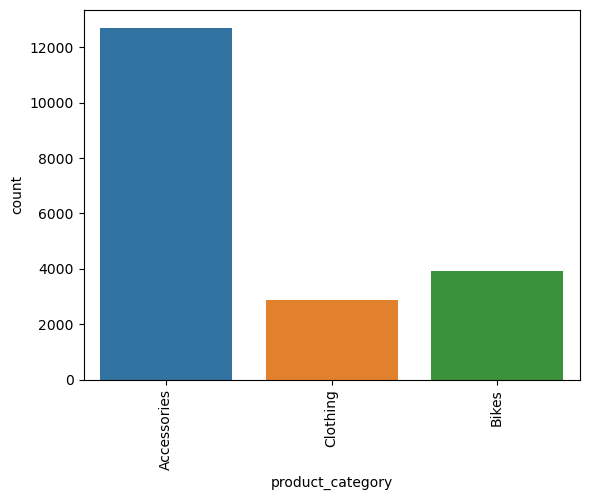

             product_category  product_category
Accessories             12716          0.651301
Bikes                    3916          0.200574
Clothing                 2892          0.148125
------------------------------
------------------------------
Univariate assessment of feature sub_category:


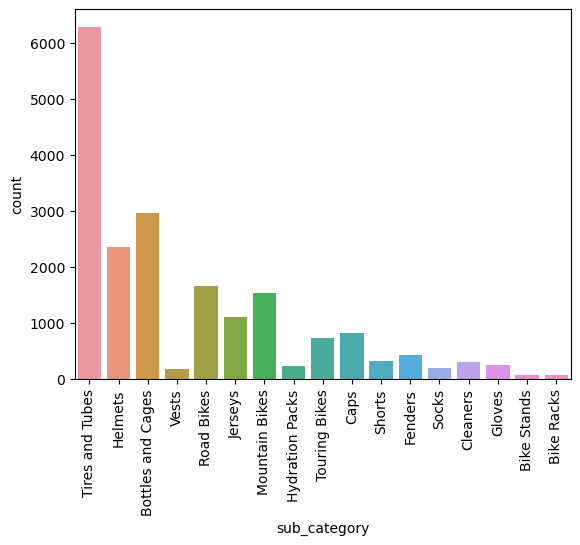

                   sub_category  sub_category
Tires and Tubes            6284      0.321860
Bottles and Cages          2969      0.152069
Helmets                    2356      0.120672
Road Bikes                 1653      0.084665
Mountain Bikes             1530      0.078365
Jerseys                    1111      0.056904
Caps                        824      0.042204
Touring Bikes               733      0.037544
Fenders                     422      0.021614
Shorts                      316      0.016185
Cleaners                    304      0.015571
Gloves                      260      0.013317
Hydration Packs             236      0.012088
Socks                       199      0.010193
Vests                       182      0.009322
Bike Stands                  81      0.004149
Bike Racks                   64      0.003278
------------------------------
------------------------------
Univariate assessment of feature quantity:


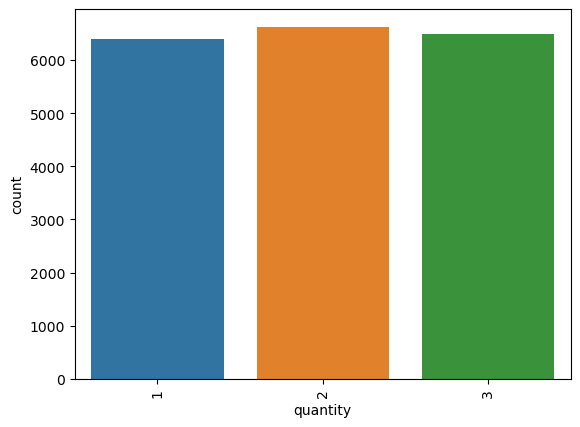

   quantity  quantity
2      6627  0.339428
3      6495  0.332667
1      6402  0.327904
------------------------------
------------------------------
Univariate Feature analysis of feature unit_cost:


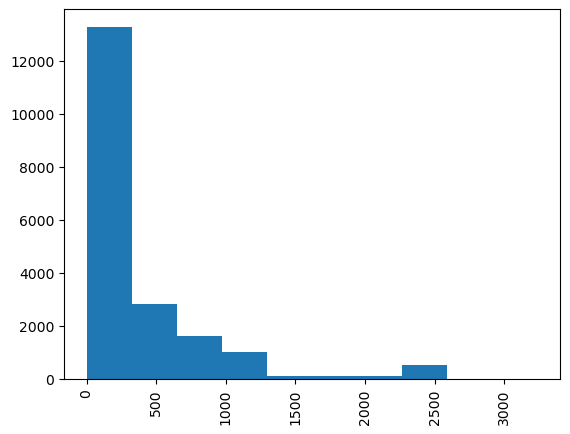

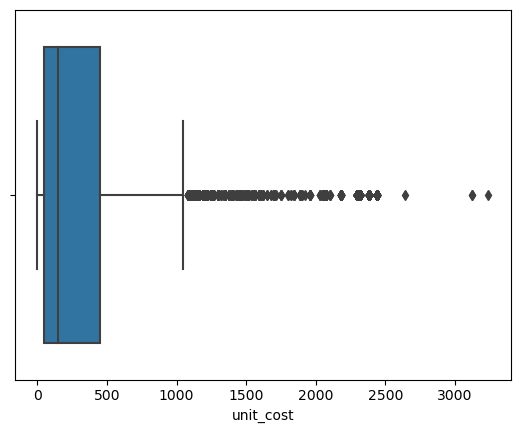

------------------------------
------------------------------
Univariate Feature analysis of feature unit_price:


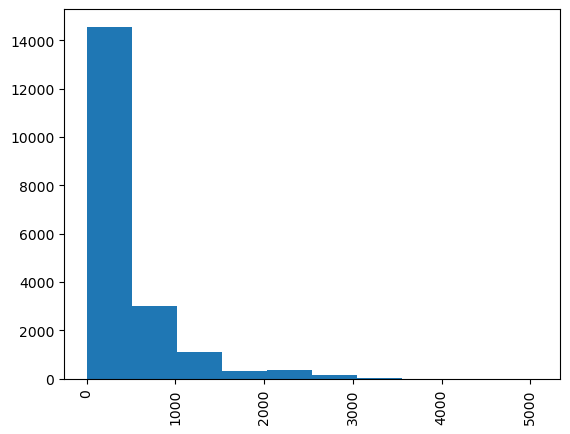

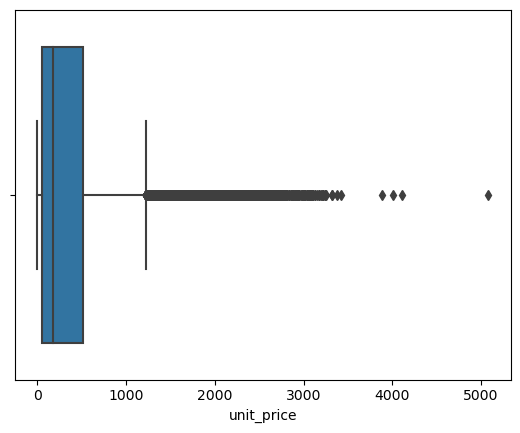

------------------------------
------------------------------
Univariate Feature analysis of feature cost:


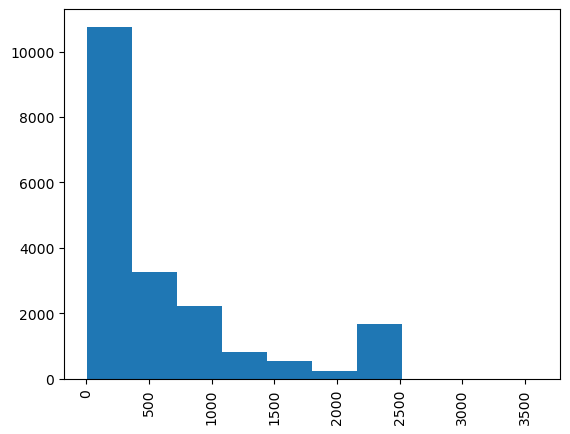

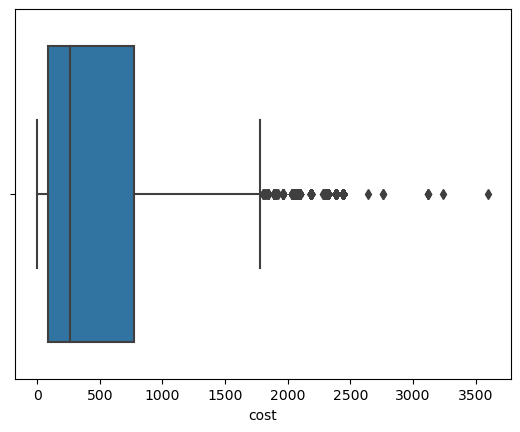

------------------------------
------------------------------
Univariate Feature analysis of feature revenue:


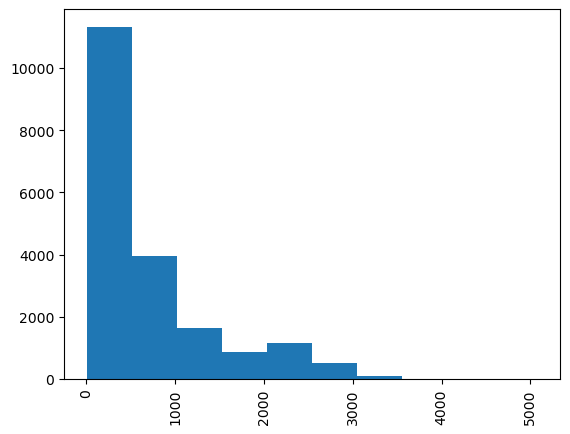

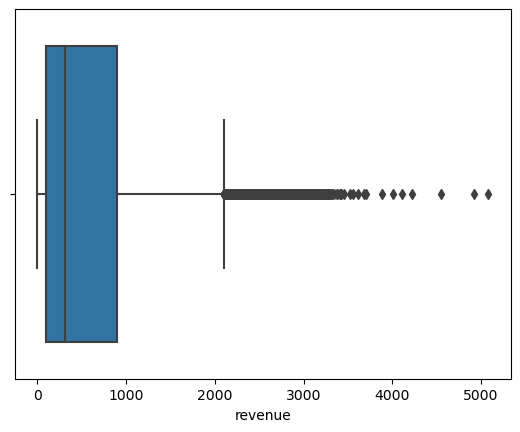

------------------------------
------------------------------
Univariate Feature analysis of feature total_price:


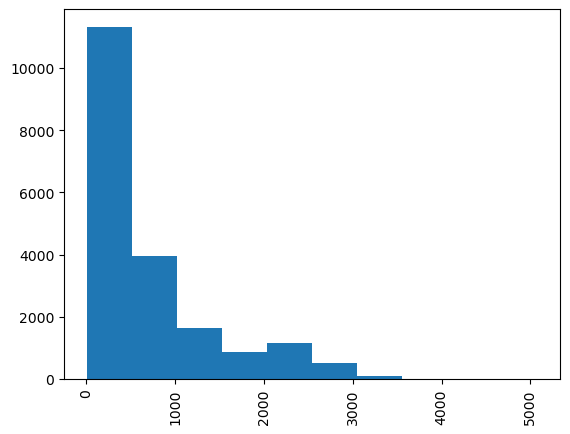

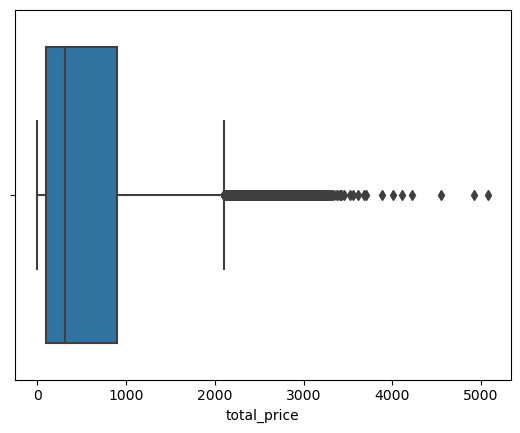

------------------------------
------------------------------


In [37]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=train, x=col)
        plt.xticks(rotation=90)
        plt.show()
        print(
            pd.concat([train[col].value_counts(),
            train[col].value_counts(normalize=True)],
                 axis=1))
    else:
        print(f'Univariate Feature analysis of feature {col}:')
        plt.hist(train[col])
        plt.xticks(rotation=90)
        plt.show()
        sns.boxplot(data=train, x=col)
#         plt.xticks(rotation=90)
        plt.show()
        train[col].describe()
    print('------------------------------')
    print('------------------------------')

### Findings: 
- May and June are the highest selling months, followed by December and April
- 50% of our customer are aged 28-44
- Gender is about equal among customers
- USA has ordered over 2x as many times as the other countries
- California, Washington and Oregon have the highest number of sales
- Accessories are sold almost 3x as much as other categories
- 'Tires and Tubes', 'Bottles and Cages' and Helmets are the highest selling sub categories

## Bivariate

In [38]:
def get_corr_heatmap(train):
    '''
    This function will display a heatmap of the potential correlations between variables in 
    our dataset
    '''
    # get the correlation values
    corr_matrix = train.corr()
    # create a plot
    plt.figure(figsize=(10,10))
    # plot a heatmap of the correlations
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    # add a title
    plt.title('Heat Map of Correlation')
    # display the plot
    plt.show()

In [40]:
def get_pairplot(train):
    '''
    This function will take in a dataFrame, and will display a pairplot of the variable
    relationships along with a regression line for each pair
    '''
    # take a sample of the dataFrame in order to cut down computing time
    plt.figure(figsize=(20,20))
    if len(df) > 500:
        sample = train.sample(500)
    else:
        sample = train
    # create a pairplot
    sns.pairplot(data=sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    
    plt.show()

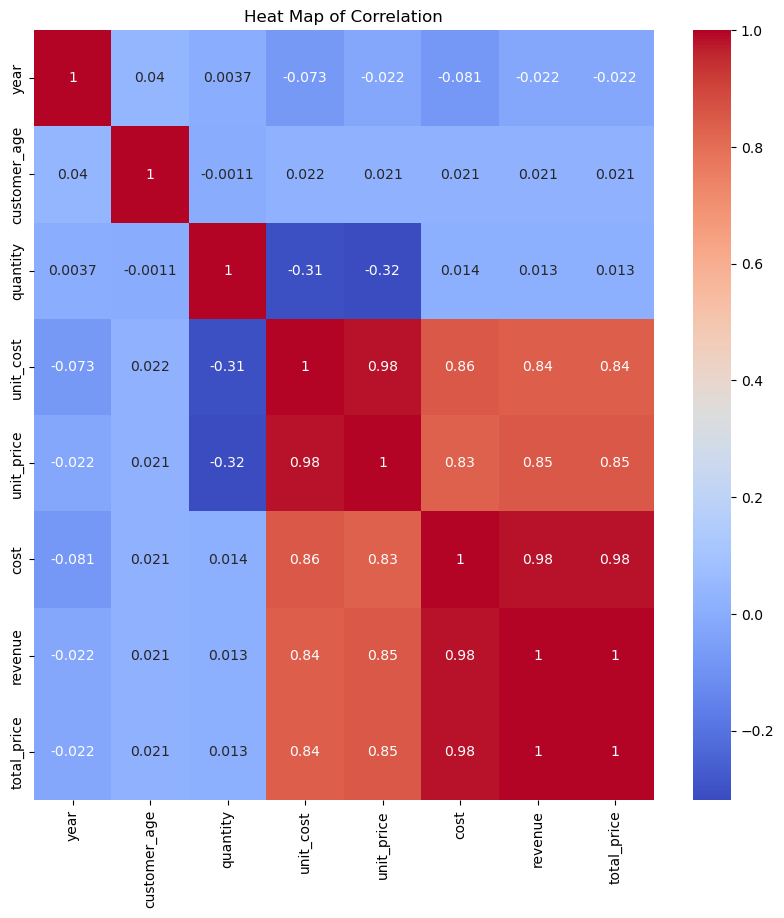

In [41]:
get_corr_heatmap(train)

<Figure size 2000x2000 with 0 Axes>

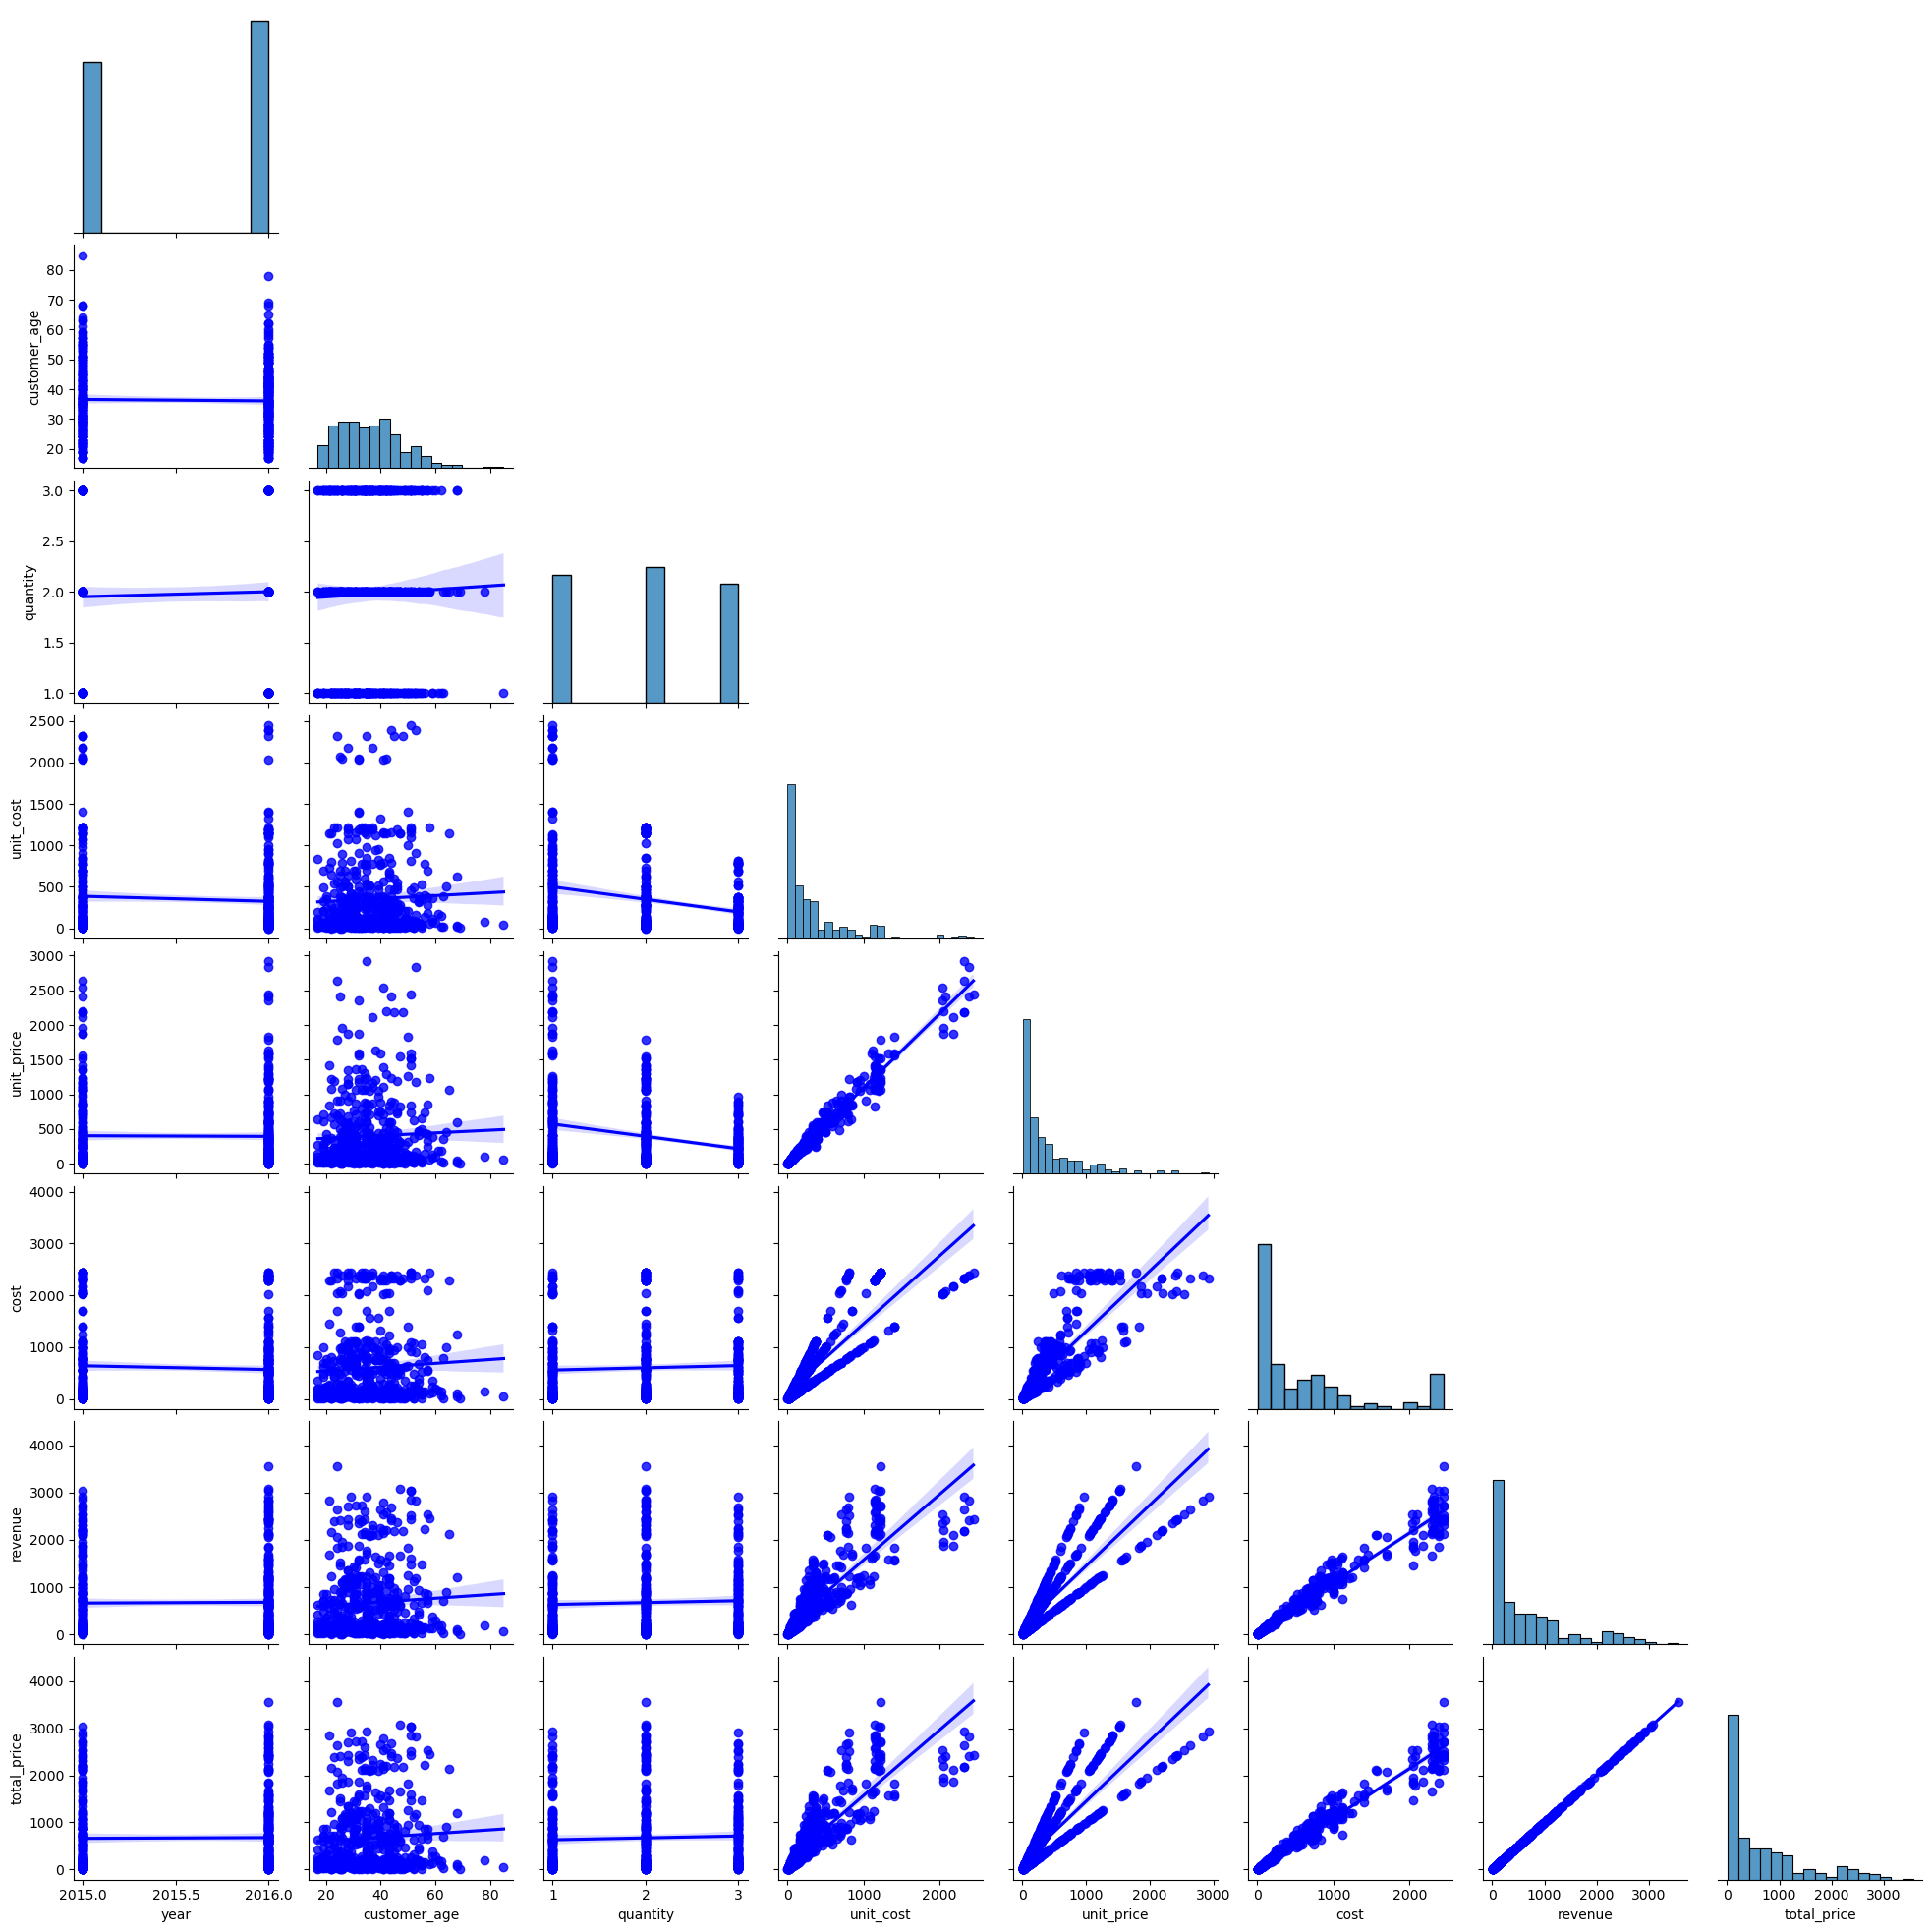

In [42]:
get_pairplot(train)